In [ ]:
import cv2
import numpy as np

filename = 'st1012.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imwrite('st1012_cornerHarris.png',img)

Lossy conversion from float64 to uint8. Range [-0.36645620915032684, 0.576709019607843]. Convert image to uint8 prior to saving to suppress this warning.


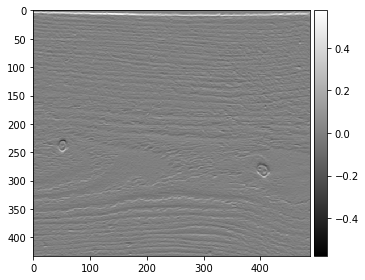

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread, imshow, imsave
from skimage.filters import prewitt_h, prewitt_v

image = imread('st1012.jpg', as_gray=True)
# imshow(image)
# image.shape, image


edges_prew_h = prewitt_h(image)
edges_prew_v = prewitt_v(image)


imshow(edges_prew_h, cmap='gray')
imsave('st1012_prewitt_h.png',edges_prew_h)


In [ ]:
filename = 'st1012.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('subpixel5.png',img)

In [1]:
import cv2
import numpy as np

img = cv2.imread('st1012.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp)

cv2.imwrite('st1012_sift_keypoints.jpg',img)

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'